In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
import numpy as np
import pandas as pd
from numpy.random import seed
seed(2020)
from tensorflow.random import set_seed
set_seed(2020)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv(filepath_or_buffer='z1/train.csv', index_col='id')
test_df = pd.read_csv(filepath_or_buffer='z1/test.csv', index_col='id')

In [3]:
x_train, y_train = train_df.iloc[:,:-1].values, train_df['label'].values
x_test = test_df.values
classes = {0:'футболка', 1:'брюки', 2:'свитер', 3:'платье', 4:'пальто',
           5:'туфли', 6:'рубашка', 7:'кроссовки', 8:'сумка', 9:'ботинки'}
x_train = x_train / 255.0
x_test = x_test / 255.0

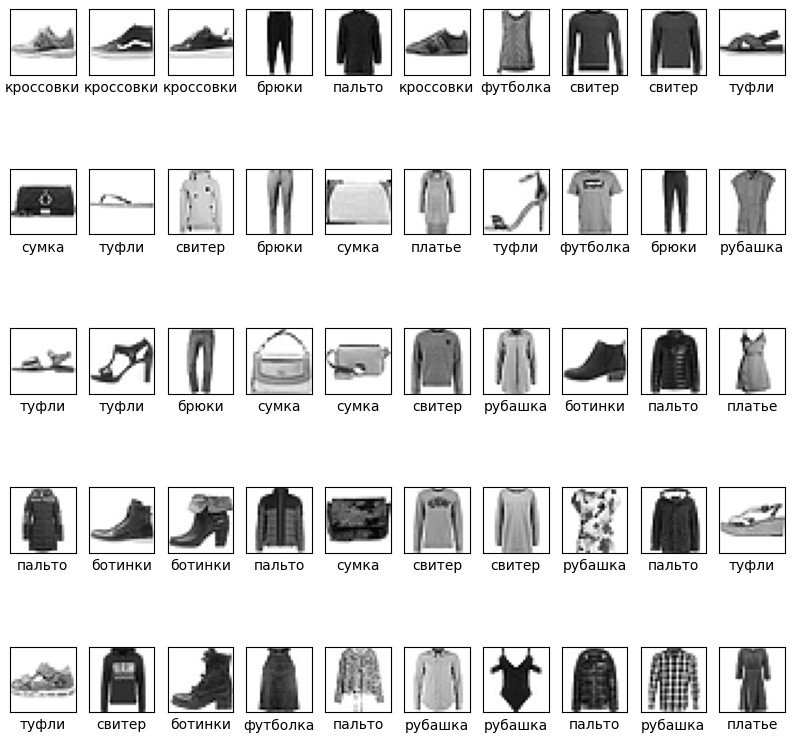

In [4]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)), cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [5]:
y_train = utils.to_categorical(y_train)

In [6]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(units=800, input_dim=784, activation="relu"))
# Скрытый слой на 800 нейронов
model.add(Dense(units=800, activation="relu"))
# Выходной полносвязный слой, 10 нейронов 
model.add(Dense(units=10, activation="softmax"))
# компилируем модель
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
print(model.summary())


c:\Users\bzorn\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 800)            │       628,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 800)            │       640,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,276,810 (4.87 MB)

 Trainable params: 1,276,810 (4.87 MB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
model.fit(x_train, y_train,
             batch_size=200,
             epochs=50,
             verbose=1)

Epoch 1/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7710 - loss: 0.6342
Epoch 2/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8673 - loss: 0.3694
Epoch 3/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8808 - loss: 0.3262
Epoch 4/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8899 - loss: 0.2986
Epoch 5/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8956 - loss: 0.2791
Epoch 6/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9020 - loss: 0.2623
Epoch 7/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9065 - loss: 0.2467
Epoch 8/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9110 - loss: 0.2317
Epoch 9/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9168 - loss: 0.2176
Epoch 10/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9201 - loss: 0.2107
Epoch 11/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9234 - loss: 0.2024
Epoch 12/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 

2057/2057 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


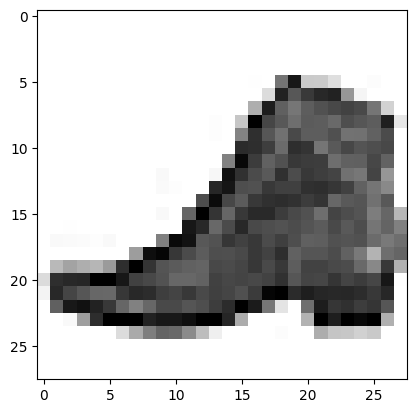

[1.2978359e-19 1.6424290e-18 6.0070845e-20 3.7134702e-21 7.6076542e-17
 2.5372212e-13 1.1965788e-15 5.8918598e-10 5.5168739e-19 1.0000000e+00]


'ботинки'

In [8]:
predictions = model.predict(x_train)
n = 1
plt.imshow(x_train[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
print(predictions[n])
np.argmax(predictions[n])
classes[np.argmax(predictions[n])]
classes[np.argmax(y_train[n])]


Epoch 1/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9530 - loss: 0.1358 - val_accuracy: 0.9557 - val_loss: 0.1193
Epoch 2/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9640 - loss: 0.0946 - val_accuracy: 0.9628 - val_loss: 0.1021
Epoch 3/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9737 - loss: 0.0687 - val_accuracy: 0.9620 - val_loss: 0.1052
Epoch 4/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9770 - loss: 0.0628 - val_accuracy: 0.9610 - val_loss: 0.1081
Epoch 5/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9782 - loss: 0.0540 - val_accuracy: 0.9565 - val_loss: 0.1228
Epoch 6/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9807 - loss: 0.0520 - val_accuracy: 0.9552 - val_loss: 0.1421
Epoch 7/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9800 - loss: 0.0530 - val_accuracy: 0.9499 - val_loss: 0.1615
Epoch 8/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9787 - loss: 0.0562 - val_accu

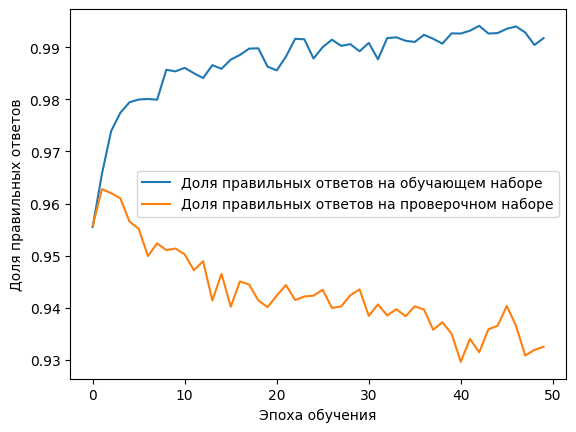

In [9]:
history = model.fit(x_train, y_train, 
                    batch_size=200, 
                    epochs=50,
                    validation_split=0.2,
                    verbose=1)
plt.plot(history.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()


In [10]:
model.save('fashion_mnist_dense.h5')

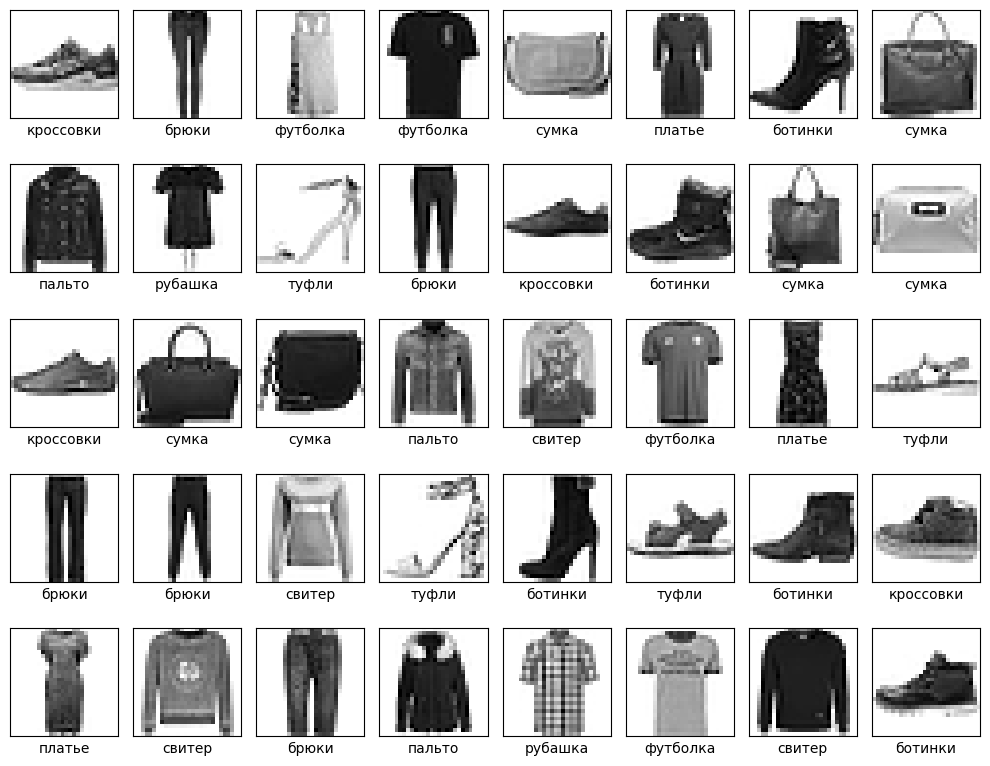

In [11]:
plt.figure(figsize=(10, 8))
for i in range(200, 240):
    plt.subplot(5, 8, i - 200 + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(classes[np.argmax(y_train[i])])
plt.tight_layout()
plt.show()

In [12]:
history = model.fit(x_train, y_train, batch_size=200, epochs=20, validation_split=0.2, verbose=1)
print("Точность после 20 эпох:", history.history['val_accuracy'][-1])

Epoch 1/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9934 - loss: 0.0187 - val_accuracy: 0.9363 - val_loss: 0.3571
Epoch 2/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9952 - loss: 0.0155 - val_accuracy: 0.9365 - val_loss: 0.3378
Epoch 3/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9938 - loss: 0.0187 - val_accuracy: 0.9318 - val_loss: 0.3583
Epoch 4/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9920 - loss: 0.0231 - val_accuracy: 0.9350 - val_loss: 0.3724
Epoch 5/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9924 - loss: 0.0222 - val_accuracy: 0.9316 - val_loss: 0.3627
Epoch 6/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9937 - loss: 0.0188 - val_accuracy: 0.9372 - val_loss: 0.3305
Epoch 7/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9930 - loss: 0.0184 - val_accuracy: 0.9340 - val_loss: 0.3882
Epoch 8/20
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9945 - loss: 0.0164 - val_accu

In [13]:
history = model.fit(x_train, y_train, batch_size=200, epochs=40, validation_split=0.2, verbose=1)
print("Точность после 40 эпох:", history.history['val_accuracy'][-1])

Epoch 1/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9953 - loss: 0.0141 - val_accuracy: 0.9343 - val_loss: 0.3806
Epoch 2/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9966 - loss: 0.0115 - val_accuracy: 0.9288 - val_loss: 0.4240
Epoch 3/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9907 - loss: 0.0287 - val_accuracy: 0.9306 - val_loss: 0.4495
Epoch 4/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9946 - loss: 0.0185 - val_accuracy: 0.9340 - val_loss: 0.4066
Epoch 5/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9965 - loss: 0.0104 - val_accuracy: 0.9305 - val_loss: 0.4205
Epoch 6/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9918 - loss: 0.0247 - val_accuracy: 0.9261 - val_loss: 0.4638
Epoch 7/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9886 - loss: 0.0404 - val_accuracy: 0.9299 - val_loss: 0.4375
Epoch 8/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9942 - loss: 0.0161 - val_accu

In [14]:
history = model.fit(x_train, y_train, batch_size=200, epochs=50, validation_split=0.2, verbose=1)
print("Точность после 50 эпох:", history.history['val_accuracy'][-1])

Epoch 1/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9958 - loss: 0.0136 - val_accuracy: 0.9245 - val_loss: 0.5553
Epoch 2/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9946 - loss: 0.0157 - val_accuracy: 0.9235 - val_loss: 0.5249
Epoch 3/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9948 - loss: 0.0151 - val_accuracy: 0.9266 - val_loss: 0.5352
Epoch 4/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9942 - loss: 0.0188 - val_accuracy: 0.9261 - val_loss: 0.5768
Epoch 5/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9945 - loss: 0.0179 - val_accuracy: 0.9299 - val_loss: 0.5827
Epoch 6/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9947 - loss: 0.0162 - val_accuracy: 0.9309 - val_loss: 0.5284
Epoch 7/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9984 - loss: 0.0047 - val_accuracy: 0.9256 - val_loss: 0.5364
Epoch 8/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9950 - loss: 0.0154 - val_accu

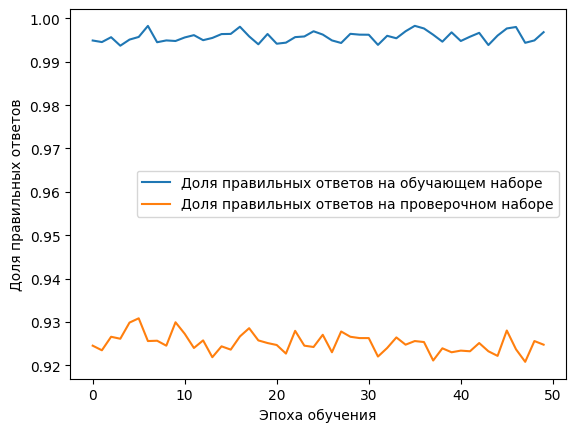

{'accuracy': [0.9948708415031433,
  0.9945098757743835,
  0.99563068151474,
  0.9936740398406982,
  0.9950798153877258,
  0.9956876635551453,
  0.9982332587242126,
  0.9944719076156616,
  0.9948897957801819,
  0.994756817817688,
  0.9955736994743347,
  0.9961056113243103,
  0.9949468374252319,
  0.9954597353935242,
  0.9963526129722595,
  0.9963905811309814,
  0.9980432987213135,
  0.9958206415176392,
  0.9939969778060913,
  0.9963715672492981,
  0.9941299557685852,
  0.9943768978118896,
  0.9956496953964233,
  0.9958016872406006,
  0.9969984889030457,
  0.9962385892868042,
  0.9948897957801819,
  0.994300901889801,
  0.9964095950126648,
  0.9962195754051208,
  0.9962006211280823,
  0.9938639998435974,
  0.9959536194801331,
  0.9953837394714355,
  0.9969984889030457,
  0.998252272605896,
  0.9976443648338318,
  0.9962006211280823,
  0.9946048855781555,
  0.9967515468597412,
  0.994756817817688,
  0.9957447052001953,
  0.9966375231742859,
  0.9938259720802307,
  0.9960106611251831,
  0.

In [21]:
plt.plot(history.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()
history.history

In [17]:
model_sgd = Sequential([
    Dense(800, input_dim=784, activation="relu"),
    Dense(800, activation="relu"),
    Dense(10, activation="softmax")
])
model_sgd.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
history_sgd = model_sgd.fit(x_train, y_train, batch_size=200, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5506 - loss: 1.5706 - val_accuracy: 0.7467 - val_loss: 0.8121
Epoch 2/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7632 - loss: 0.7527 - val_accuracy: 0.7888 - val_loss: 0.6634
Epoch 3/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7980 - loss: 0.6308 - val_accuracy: 0.8039 - val_loss: 0.5997
Epoch 4/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8123 - loss: 0.5712 - val_accuracy: 0.8109 - val_loss: 0.5643
Epoch 5/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8225 - loss: 0.5350 - val_accuracy: 0.8157 - val_loss: 0.5411
Epoch 6/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8290 - loss: 0.5103 - val_accuracy: 0.8204 - val_loss: 0.5237
Epoch 7/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8336 - loss: 0.4920 - val_accuracy: 0.8248 - val_loss: 0.5094
Epoch 8/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8375 - loss: 0.4778 - val_accuracy: 0.

2057/2057 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


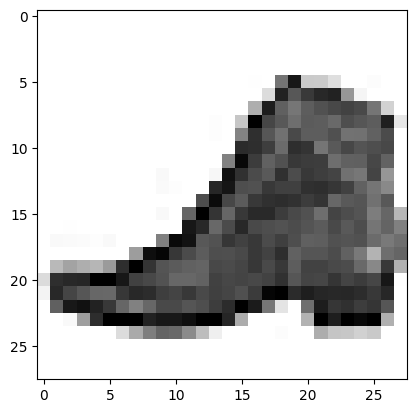

[6.3043200e-07 6.2744404e-10 1.2724524e-08 3.2208676e-09 3.3095853e-09
 2.2886439e-04 2.1101121e-07 5.9249317e-03 6.4278698e-05 9.9378103e-01]


'ботинки'

In [19]:
predictions_sgd = model_sgd.predict(x_train)
n = 1
plt.imshow(x_train[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
print(predictions_sgd[n])
np.argmax(predictions_sgd[n])
classes[np.argmax(predictions_sgd[n])]
classes[np.argmax(y_train[n])]

In [20]:
model_adamax = Sequential([
    Dense(800, input_dim=784, activation="relu"),
    Dense(800, activation="relu"),
    Dense(10, activation="softmax")
])
model_adamax.compile(loss="categorical_crossentropy", optimizer="Adamax", metrics=["accuracy"])
history_adamax = model_adamax.fit(x_train, y_train, batch_size=200, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50


c:\Users\bzorn\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7503 - loss: 0.7086 - val_accuracy: 0.8461 - val_loss: 0.4312
Epoch 2/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8604 - loss: 0.3944 - val_accuracy: 0.8635 - val_loss: 0.3817
Epoch 3/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8748 - loss: 0.3502 - val_accuracy: 0.8731 - val_loss: 0.3543
Epoch 4/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8849 - loss: 0.3204 - val_accuracy: 0.8799 - val_loss: 0.3329
Epoch 5/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8936 - loss: 0.2964 - val_accuracy: 0.8840 - val_loss: 0.3192
Epoch 6/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9000 - loss: 0.2782 - val_accuracy: 0.8856 - val_loss: 0.3104
Epoch 7/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9052 - loss: 0.2619 - val_accuracy: 0.8875 - val_loss: 0.3068
Epoch 8/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9111 - loss: 0.2472 - val_accuracy: 0.885

2057/2057 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


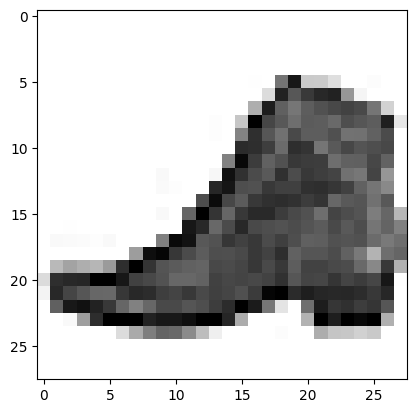

[2.9622807e-17 1.5362701e-19 2.4452945e-14 2.0510716e-20 2.3871731e-22
 1.2770999e-13 8.6722438e-27 4.4989880e-16 5.5736972e-17 1.0000000e+00]


'ботинки'

In [22]:
predictions_adamax = model_adamax.predict(x_train)
n = 1
plt.imshow(x_train[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
print(predictions_adamax[n])
np.argmax(predictions_adamax[n])
classes[np.argmax(predictions_adamax[n])]
classes[np.argmax(y_train[n])]

In [23]:
model_tanh = Sequential([
    Dense(800, input_dim=784, activation="relu"),
    Dense(500, activation="tanh"),
    Dense(10, activation="softmax")
])
model_tanh.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
history_tanh = model_tanh.fit(x_train, y_train, batch_size=200, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7526 - loss: 0.6871 - val_accuracy: 0.8223 - val_loss: 0.4735
Epoch 2/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8621 - loss: 0.3783 - val_accuracy: 0.8516 - val_loss: 0.4029
Epoch 3/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8789 - loss: 0.3338 - val_accuracy: 0.8628 - val_loss: 0.3669
Epoch 4/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8899 - loss: 0.3054 - val_accuracy: 0.8672 - val_loss: 0.3582
Epoch 5/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8950 - loss: 0.2870 - val_accuracy: 0.8745 - val_loss: 0.3381
Epoch 6/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9016 - loss: 0.2695 - val_accuracy: 0.8788 - val_loss: 0.3336
Epoch 7/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9071 - loss: 0.2556 - val_accuracy: 0.8823 - val_loss: 0.3205
Epoch 8/50
264/264 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9111 - loss: 0.2420 - val_accur

2057/2057 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


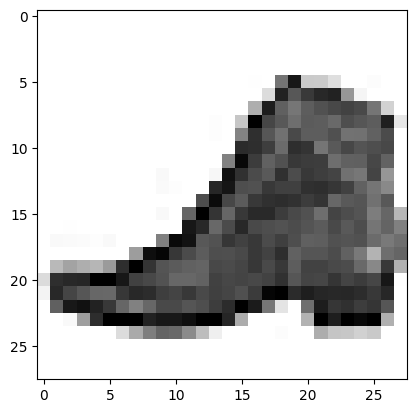

[1.6245231e-15 5.0663309e-13 5.3013406e-18 4.0634113e-16 5.2935225e-17
 1.5874461e-10 2.4198050e-21 6.3443331e-09 2.0809615e-15 1.0000000e+00]


'ботинки'

In [24]:
predictions_tanh = model_tanh.predict(x_train)
n = 1
plt.imshow(x_train[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
print(predictions_tanh[n])
np.argmax(predictions_tanh[n])
classes[np.argmax(predictions_tanh[n])]
classes[np.argmax(y_train[n])]